## Total variation and Quadratic variation of Brownian Motion


In [41]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [44]:
# Define parameters and time grid
npaths=500 # number of paths to simulate
T = 1 # time horizon
nsteps = 350 # number of steps
dt = T/nsteps # time step
t = np.linspace(0,1, num=200+1) # observation times

# jstep = 50:50:10000;
jstep = range(50,10000+1,50)

avg_TV = []
avg_QV = []

for i in range(len(jstep)): #increase the number of steps (refine the partition)
    # Reduce the time step
    dt=T/jstep[i] 

    # Simulate BM
    N = np.random.randn(jstep[i],npaths)*np.sqrt(dt)
    dX = np.append(np.zeros([1,npaths]), N,axis=0)

    # Compute total variation
    avg_TV.append(sum(sum(abs(dX)))/npaths)

    # Compute quadratic variation
    avg_QV.append(sum(sum(dX**2))/npaths)

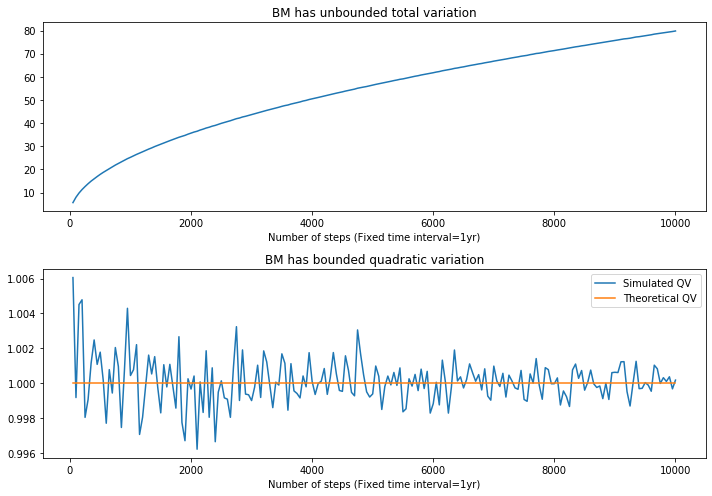

In [48]:
fig,ax = plt.subplots(2,figsize=(10,7))
ax[0].plot(jstep,avg_TV)
ax[0].set_title('BM has unbounded total variation')
ax[0].set_xlabel('Number of steps (Fixed time interval=1yr)')

ax[1].plot(jstep, avg_QV, label='Simulated QV')
ax[1].plot(jstep, len(jstep)*[T], label='Theoretical QV')
ax[1].set_title('BM has bounded quadratic variation')
ax[1].set_xlabel('Number of steps (Fixed time interval=1yr)')
ax[1].legend()
plt.tight_layout()